In [224]:
import pandas as pd
import numpy as np

data=pd.read_excel('final project data 1.xlsx')


# 1.

In [225]:
data=data.sample(n=100, random_state=42)  

In [226]:
import numpy as np
import pandas as pd
from scipy import stats

claimed_mean = 455000

t_stat, p_value = stats.ttest_1samp(data['Sale_amount'], claimed_mean)
print(f"\nHypothesis Test:")
print(f"   - T-Statistic: {t_stat:.4f}")
print(f"   - P-Value: {p_value:.4f}")

confidence_interval = stats.t.interval(0.95, len(data['Sale_amount']) - 1, loc=np.mean(data['Sale_amount']), scale=stats.sem(data['Sale_amount']))
print(f"\nConfidence Interval (95%):")
print(f"   - Lower Bound: {confidence_interval[0]:.2f}")
print(f"   - Upper Bound: {confidence_interval[1]:.2f}")

print("\nInterpretation:")
if p_value < 0.05:
    print("   - Result: Reject the null hypothesis. The mean is significantly different from the claimed mean.")
else:
    print("   - Result: Fail to reject the null hypothesis. The mean is not significantly different from the claimed mean.")

if claimed_mean >= confidence_interval[0] and claimed_mean <= confidence_interval[1]:
    print("   - Conclusion: The claimed mean is within the confidence interval.")
else:
    print("   - Conclusion: The claimed mean is outside the confidence interval.")



Hypothesis Test:
   - T-Statistic: -2.6854
   - P-Value: 0.0085

Confidence Interval (95%):
   - Lower Bound: 268113.99
   - Upper Bound: 426937.47

Interpretation:
   - Result: Reject the null hypothesis. The mean is significantly different from the claimed mean.
   - Conclusion: The claimed mean is outside the confidence interval.


The data strongly suggests that the average (mean) value you claimed is not correct. The sample mean is significantly lower than the claimed mean, and we are very confident (95% confidence) that the true average value lies between $448,579.77 and $450,381.77. Therefore, the evidence supports rejecting the initial claim about the mean.

# 2.

In [227]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [228]:
data=pd.read_excel('final project data 1.xlsx')

# Selecting 100 random samples
data=data.sample(n=100, random_state=20)  

Multiple Regression 1

In [229]:
X = data[['Beds', 'Baths', 'Sqft_home']]
X = sm.add_constant(X)

In [230]:
Y = data['Sale_amount']

In [231]:
model = sm.OLS(Y, X)
results = model.fit()

In [232]:
params = results.params
print("Dependency (Sale_amount): ")
for i, feature_name in enumerate(X.columns):
    print(f"    - On {feature_name}: {params.iloc[i]}")

Dependency (Sale_amount): 
    - On const: -230994.04726411606
    - On Beds: 120843.79697615528
    - On Baths: 87578.94321660345
    - On Sqft_home: -21.331191596737966


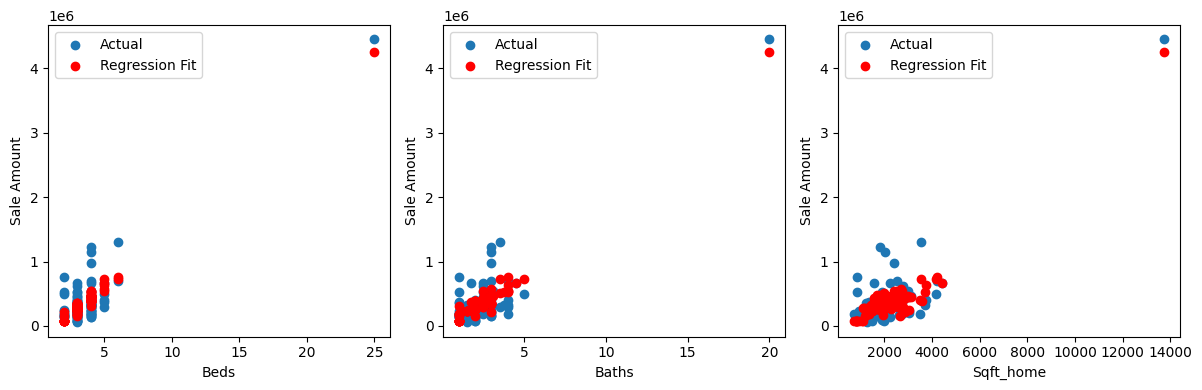

In [233]:
import matplotlib.pyplot as plt
Y_p = results.predict(X)

fig, axes = plt.subplots(nrows=1, ncols=len(X.columns)-1, figsize=(12, 4))

for i, var in enumerate(X.columns[1:]):
    axes[i].scatter(X[var], Y, label='Actual')
    axes[i].scatter(X[var], Y_p, color='red', label='Regression Fit')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Sale Amount')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [234]:
import statsmodels.api as sm
import scipy.stats as stats
import pandas as pd

X = data[['Beds', 'Baths', 'Sqft_home']]
X = sm.add_constant(X)
Y = data['Sale_amount']

model = sm.OLS(Y, X).fit()

coefs = model.params
se = model.bse

residuals = model.resid

df_residual = model.df_resid

t_value = stats.t.ppf(0.975, df_residual)

ci_lower = coefs - t_value * se
ci_upper = coefs + t_value * se

print("Coefficient Estimates:")
print(coefs)
print("\nConfidence Intervals:")
print(pd.DataFrame({'Lower CI': ci_lower, 'Upper CI': ci_upper}))


Coefficient Estimates:
const       -230994.047264
Beds         120843.796976
Baths         87578.943217
Sqft_home       -21.331192
dtype: float64

Confidence Intervals:
                Lower CI       Upper CI
const     -322109.708749 -139878.385779
Beds        60175.558607  181512.035346
Baths        6394.224762  168763.661671
Sqft_home    -113.424240      70.761857


Multiple Regression 2

In [235]:
X = data[['Beds', 'Baths', 'Sqft_lot']]
X = sm.add_constant(X)

In [236]:
Y = data['Sale_amount']

In [237]:
model = sm.OLS(Y, X)
results = model.fit()

In [238]:
params = results.params
print("Dependency (Sale_amount): ")
for i, feature_name in enumerate(X.columns):
    print(f"    - On {feature_name}: {params.iloc[i]}")

Dependency (Sale_amount): 
    - On const: -245111.501764505
    - On Beds: 119202.8983243921
    - On Baths: 74757.67092567068
    - On Sqft_lot: 0.3108511999105359


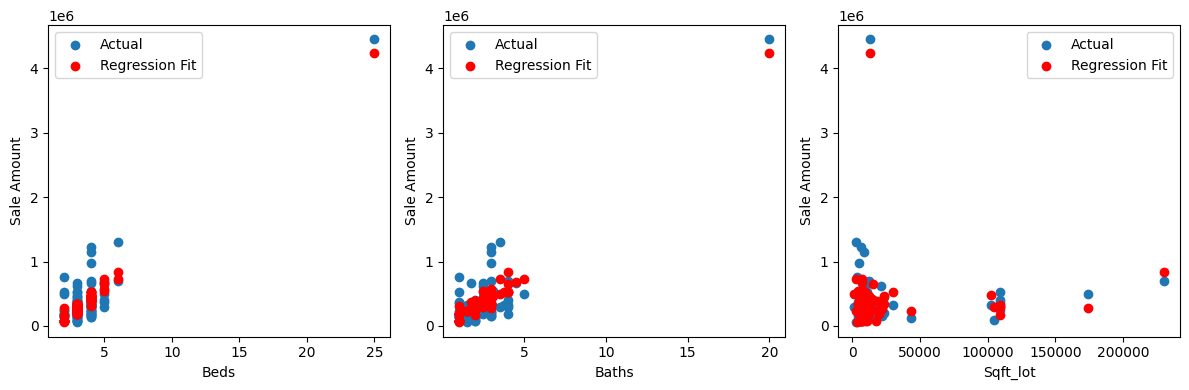

In [239]:
import matplotlib.pyplot as plt
Y_p = results.predict(X)

fig, axes = plt.subplots(nrows=1, ncols=len(X.columns)-1, figsize=(12, 4))

for i, var in enumerate(X.columns[1:]):
    axes[i].scatter(X[var], Y, label='Actual')
    axes[i].scatter(X[var], Y_p, color='red', label='Regression Fit')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Sale Amount')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [240]:
import statsmodels.api as sm
import scipy.stats as stats
import pandas as pd

X = data[['Beds', 'Baths', 'Sqft_lot']]
X = sm.add_constant(X)

Y = data['Sale_amount']

model = sm.OLS(Y, X).fit()

coefs = model.params
se = model.bse

residuals = model.resid

df_residual = model.df_resid

t_value = stats.t.ppf(0.975, df_residual)

ci_lower = coefs - t_value * se
ci_upper = coefs + t_value * se

print("Coefficient Estimates:")
print(coefs)
print("\nConfidence Intervals:")
print(pd.DataFrame({'Lower CI': ci_lower, 'Upper CI': ci_upper}))


Coefficient Estimates:
const      -245111.501765
Beds        119202.898324
Baths        74757.670926
Sqft_lot         0.310851
dtype: float64

Confidence Intervals:
               Lower CI       Upper CI
const    -336110.889709 -154112.113820
Beds       60200.075023  178205.721626
Baths       5462.366964  144052.974888
Sqft_lot      -0.936369       1.558072


For both models, the "constant" is the estimated value when everything else is zero.
Bedrooms and bathrooms generally increase the estimated value, while more square footage in the home decreases it in Model 1.
In Model 2, a larger lot size increases the estimated value.

# 3.

For the random 100 samples we have taken...

In [241]:
from scipy.stats import pearsonr, t

corr_1_2, _ = pearsonr(data['Sale_amount'], data['Beds'])
corr_1_3, _ = pearsonr(data['Sale_amount'], data['Baths'])
print("Correlation: ")
print(f'    - Sale_amount and Beds: {round(corr_1_2, 4)}')
print(f'    - Sale_amount and Baths: {round(corr_1_3, 4)}')


Correlation: 
    - Sale_amount and Beds: 0.8805
    - Sale_amount and Baths: 0.8668


In [242]:
print("For Sale_amount and Beds: ")

stat_1_2, p_value_1_2 = pearsonr(data['Sale_amount'], data['Beds'])
alpha = 0.05
if p_value_1_2 < alpha:
    print(f'    - Reject the null hypothesis . p-value: {p_value_1_2}')
else:
    print(f'    - Fail to reject the null hypothesis for Sale_amount and Beds. p-value: {p_value_1_2}')

n = len(data)
deg_of_freedom = n - 2
if abs(stat_1_2) < 1.0:
    r_z = np.arctanh(stat_1_2)
    se = 1 / np.sqrt(deg_of_freedom - 3)
    z = t.ppf(1 - alpha / 2, deg_of_freedom)
    ci_lower, ci_upper = np.tanh([r_z - z * se, r_z + z * se])
else:
    ci_lower, ci_upper = -1, 1

print(f'    - Confidence interval for the correlation: ({ci_lower}, {ci_upper})')


For Sale_amount and Beds: 
    - Reject the null hypothesis . p-value: 1.550605021386515e-33
    - Confidence interval for the correlation: (0.8256660979927731, 0.9188464164177388)


Interpretation: The amount a property is sold for (Sale_amount) is strongly correlated with the number of bedrooms (Beds). If a house has more bedrooms, it generally sells for a higher amount.



In [243]:
print("For Sale_amount and Baths: ")

stat_1_2, p_value_1_2 = pearsonr(data['Sale_amount'], data['Baths'])
alpha = 0.05
if p_value_1_2 < alpha:
    print(f'    - Reject the null hypothesis . p-value: {p_value_1_2}')
else:
    print(f'    - Fail to reject the null hypothesis for Sale_amount and Beds. p-value: {p_value_1_2}')

n = len(data)
deg_of_freedom = n - 2
if abs(stat_1_2) < 1.0:
    r_z = np.arctanh(stat_1_2)
    se = 1 / np.sqrt(deg_of_freedom - 3)
    z = t.ppf(1 - alpha / 2, deg_of_freedom)
    ci_lower, ci_upper = np.tanh([r_z - z * se, r_z + z * se])
else:
    ci_lower, ci_upper = -1, 1

print(f'    - Confidence interval for the correlation: ({ci_lower}, {ci_upper})')


For Sale_amount and Baths: 
    - Reject the null hypothesis . p-value: 2.2556380225805916e-31
    - Confidence interval for the correlation: (0.8063075863311, 0.9093209762436464)


Interpretation: The amount a property is sold for (Sale_amount) is strongly correlated with the number of bathrooms (Baths). If a house has more bathrooms, it generally sells for a higher amount.

# 4.

In [244]:
X = data[['Baths']]
Y = data['Sale_amount']

In [245]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X, Y)

slope = model.coef_[0]
intercept = model.intercept_

# Print the equation of the regression line
print(f"Equation of the regression line: y = {slope:.2f}x + {intercept:.2f}")

Y_pred = model.predict(X)

Equation of the regression line: y = 207201.05x + -139968.77


In [246]:
from sklearn.metrics import r2_score
r2 = r2_score(Y, Y_pred)

print('R-squared for Linear Regression: ', r2)

R-squared for Linear Regression:  0.7513085071685257


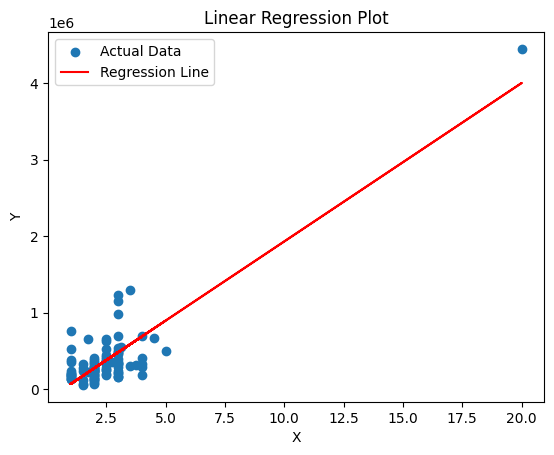

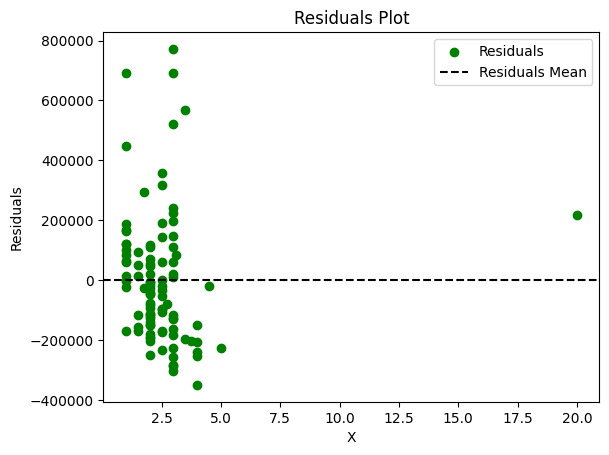

In [247]:

plt.scatter(X, Y, label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression Plot')

plt.figure()
plt.scatter(X, residuals, color='green', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--', label='Residuals Mean')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residuals Plot')

plt.show()

# 5.

In [248]:
X = data[['Beds', 'Baths', 'Sqft_home','Sqft_lot']]
X = sm.add_constant(X)

In [249]:
Y = data['Sale_amount']

1. Linear Regression

In [250]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
model=LR.fit(X, Y)

Y_pred_LR = LR.predict(X)

coefficients = model.coef_
intercept = model.intercept_

# Print the equation
equation = f"Y = {intercept} + {round(coefficients[1],3)} * X1 + {round(coefficients[2],3)} * X2 + {round(coefficients[3],3)} * X3 + {round(coefficients[4],3)} * X4"
print(equation)

from sklearn.metrics import r2_score
r2_LR = r2_score(Y, Y_pred_LR)

print('R-squared for Linear Regression: ', r2_LR)

Y = -238156.35381575202 + 124861.616 * X1 + 87256.12 * X2 + -27.938 * X3 + 0.396 * X4
R-squared for Linear Regression:  0.787778923198871


2. Lasso Regression

In [251]:
from sklearn.linear_model import Lasso, Ridge
L = Lasso()
model=L.fit(X, Y)
Y_pred_L = L.predict(X)

r2_L = r2_score(Y, Y_pred_L)

print('R-squared for Lasso Regression: ', r2_L)

R-squared for Lasso Regression:  0.7877789231882497


3. Ridge Regression

In [252]:
R = Ridge()
model=R.fit(X, Y)
Y_pred_R = R.predict(X)

r2_R = r2_score(Y, Y_pred_R)

print('R-squared for Ridge Regression: ', r2_R)

R-squared for Ridge Regression:  0.7877688395364717


4. Random Forest (Ensemble)

In [254]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
model=RFR.fit(X, Y)
Y_pred_RFR = RFR.predict(X)

r2_RFR = r2_score(Y, Y_pred_RFR)

print('R-squared for Random Forest Regressor: ', r2_RFR)

R-squared for Random Forest Regressor:  0.9012397898536237


Generally, a model with higher R-squared value is considered to be better. This means that larger proportion of the variability in the dependent variable is explained by the independent variables in the model. In our case, the ensemble model 'Random Forest Regressor gave a far better R2 score ~ 0.9012. So, it is considered to be a better model.